In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]



In [3]:
import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model

In [4]:
load_dotenv()

True

In [5]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [6]:
llm=init_chat_model("groq:llama-3.1-8b-instant")

In [7]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

In [8]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot",END)
graph = graph_builder.compile()

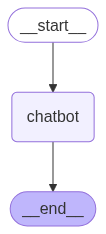

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [10]:
response=graph.invoke({"messages":"hi"})
response

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='f5f0448d-e134-49d3-aa14-d2e246a2d2b2'),
  AIMessage(content='Hello.  How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 36, 'total_tokens': 47, 'completion_time': 0.018228217, 'prompt_time': 0.001696535, 'queue_time': 0.053085675, 'total_time': 0.019924752}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--7e1268fb-9edf-47a1-b88e-9f610e573c0d-0', usage_metadata={'input_tokens': 36, 'output_tokens': 11, 'total_tokens': 47})]}

In [11]:
response['messages'][-1].content

'Hello.  How can I assist you today?'

In [12]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)
            
stream_graph_updates("how are you?")

Assistant: I'm just a language model, so I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?


In [13]:

# while True:
#     try:
#         user_input = input("User: ")
#         if user_input.lower() in ["quit", "exit", "q"]:
#             print("Goodbye!")
#             break
#         stream_graph_updates(user_input)
#     except:
#         # fallback if input() is not available
#         user_input = "What do you know about LangGraph?"
#         print("User: " + user_input)
#         stream_graph_updates(user_input)
#         break

# chat tool

In [14]:
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)


In [ ]:
from langchain_tavily import TavilySearch


tool = TavilySearch(max_results=2,api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'))))
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki',
   'url': 'https://deepwiki.com/langchain-ai/langgraph-101/2.2-nodes-and-edges',
   'content': 'Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki Nodes and Edges Nodes and Edges What are Nodes and Edges? In LangGraph, a graph is composed of nodes connected by edges to form a directed workflow. Nodes are the workhorses of LangGraph - they are Python functions that receive the current graph state as input, perform operations, and return updates to that state. Edges define the flow of execution between nodes in a LangGraph. graph_builder.add_edge("retrieve_documents", "generate_response") Conditional edges use a function to determine the next node based on the current state. Building a Graph with Nodes and Edges graph_builder.add_node("retrieve_documents", retrieve_documents) graph_builder.add_edge(

In [16]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# Modification: tell the LLM which tools it can call
# highlight-next-line




graph_builder.add_node("chatbot", chatbot)

In [50]:
def findsquare(a: int) -> int:
    """
    Returns the square of a number.

    Args:
        a (int): Input number.

    Returns:
        int: The square of the input.
    """
    return a**2


In [61]:
tools=[tool,findsquare]
llm_tools = llm.bind_tools(tools)
llm_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001E99B29EC10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E99B29F610>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A

<!-- state graph -->

#stategraph

In [64]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

In [65]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
def tool_calling_llm(state: State):
    return {"messages": [llm_tools.invoke(state["messages"])]}

graph_builder = StateGraph(State)
graph_builder.add_node("tool_calling_llm",tool_calling_llm)
graph_builder.add_node("tools",ToolNode(tools))


In [66]:
graph_builder.add_edge(START,"tool_calling_llm")
graph_builder.add_conditional_edges("tool_calling_llm",tools_condition)
graph_builder.add_edge("tools",END)
runnable_graph=graph_builder.compile()

In [67]:
response=runnable_graph .invoke({"messages":"what is recent AI news"})
response

{'messages': [HumanMessage(content='what is recent AI news', additional_kwargs={}, response_metadata={}, id='5a01c1fd-1366-42d7-a2f8-368f74966504'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sgacm6z93', 'function': {'arguments': '{"exclude_domains":[],"query":"recent AI news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 1240, 'total_tokens': 1276, 'completion_time': 0.069648973, 'prompt_time': 0.077387777, 'queue_time': 0.053280803, 'total_time': 0.14703675}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ea7adc-60d4-4e3c-a74d-ae7669dcc49d-0', tool_calls=[{'name': 'tavily_search', 'args': {'exclude_domains': [], 'query': 'recent AI news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': 'sgacm6z93', 'type': 'tool_call'}], usage_metadata={'input_to

In [68]:
response['messages'][-1].content

'{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.newsweek.com/nw-ai/ai-impact-awards-2025-science-engineering-2084754", "title": "AI Impact Awards 2025: The Changing Human Role in Science and Engineering - Newsweek", "score": 0.7251239, "published_date": "Wed, 25 Jun 2025 10:02:01 GMT", "content": "Newsweek _\\\\_will continue the conversation on meaningful AI innovations at our AI Impact Summit from June 23 to 25 in Sonoma, California. Click here to follow along on the live blog.\\\\__\\n\\nRequest Reprint & LicensingSubmit CorrectionView Editorial Guidelines\\n\\nSHARE:xfacebooklinkedinredditemailwhatsappCopy & Share\\n\\n✓ Link copied to clipboard!\\n\\nThe Latest in AI\\n----------------\\n\\nNEWSWEEK.AI\\n\\n06.09.25\\n\\n### Generative AI\'s Mission to Explore Strange New Worlds [...] ### AI Will Connect Mercedes-Benz Places Residents to the World\\n\\nThe new Miami condo complex will have state-of-the-art te

In [72]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the square of 7
================================== Ai Message ==================================
Tool Calls:
  findsquare (vxaqrf4da)
 Call ID: vxaqrf4da
  Args:
    a: 7
================================= Tool Message =================================
Name: findsquare

49


In [71]:
response=runnable_graph .invoke({"messages":"what is the square of 7"})

# react agent works:
1.act
2.observe
3.reasoning

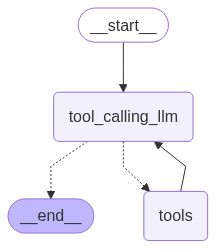

In [73]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
def tool_calling_llm(state: State):
    return {"messages": [llm_tools.invoke(state["messages"])]}

graph_builder = StateGraph(State)
graph_builder.add_node("tool_calling_llm",tool_calling_llm)
graph_builder.add_node("tools",ToolNode(tools))
graph_builder.add_edge(START,"tool_calling_llm")
graph_builder.add_conditional_edges("tool_calling_llm",tools_condition)
graph_builder.add_edge("tools","tool_calling_llm")
runnable_graph=graph_builder.compile()
runnable_graph

In [74]:
response=runnable_graph .invoke({"messages":"what is the square of 7 and recent news realated ai"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the square of 7 and recent news realated ai
================================== Ai Message ==================================
Tool Calls:
  findsquare (a1kvkxj21)
 Call ID: a1kvkxj21
  Args:
    a: 7
  tavily_search (29wr201ms)
 Call ID: 29wr201ms
  Args:
    query: recent AI news
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: findsquare

49
================================= Tool Message =================================
Name: tavily_search

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.businessinsider.com/cargurus-working-group-employees-ai-experimentation-2025-6", "title": "CarGurus created a working group for AI experimentation. Employees are buying in. - Business Insider", "score": 0.6557114, "published_date": "Wed, 25 J

# adding memory in agent

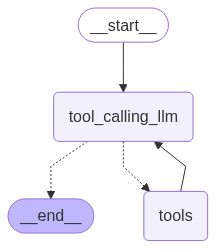

In [89]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
class State(TypedDict):
    messages: Annotated[list, add_messages]
memory=MemorySaver()
    
def tool_calling_llm(state: State):
    return {"messages": [llm_tools.invoke(state["messages"])]}

graph_builder = StateGraph(State)
graph_builder.add_node("tool_calling_llm",tool_calling_llm)
graph_builder.add_node("tools",ToolNode(tools))
graph_builder.add_edge(START,"tool_calling_llm")
graph_builder.add_conditional_edges("tool_calling_llm",tools_condition)
graph_builder.add_edge("tools","tool_calling_llm")
runnable_graph=graph_builder.compile(checkpointer=memory)
runnable_graph

In [90]:
config={"configurable":{"thread_id":1}}

In [91]:
response=runnable_graph .invoke({"messages":"my name is jiya.please remember it"},config=config)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

my name is jiya.please remember it
================================== Ai Message ==================================

I'll remember your name is Jiya.


In [92]:
response=runnable_graph .invoke({"messages":"what is my name"},config=config)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

my name is jiya.please remember it
================================== Ai Message ==================================

I'll remember your name is Jiya.
================================ Human Message =================================

what is my name
================================== Ai Message ==================================

Jiya


# stream

In [103]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [104]:
def superbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

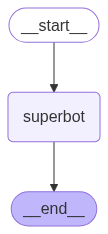

In [105]:

graph_super = StateGraph(State)
graph_super.add_node("superbot",superbot)

graph_super.add_edge(START,"superbot")

graph_super.add_edge("superbot",END)
runnable_graph=graph_super.compile(checkpointer=memory)
runnable_graph

In [106]:
config={"configurable":{"thread_id":2}}
response=runnable_graph .invoke({"messages":"MY NAME IS JIYA.I LIKE READING"},config=config)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

MY NAME IS JIYA.I LIKE READING
================================== Ai Message ==================================

Nice to meet you, Jiya.  I'm glad to hear that you like reading. Reading is an amazing hobby that can transport you to different worlds, introduce you to new ideas, and even broaden your perspectives. What kind of books do you enjoy reading? Are you into fiction, non-fiction, mystery, sci-fi, romance, or something else?


In [111]:
config={"configurable":{"thread_id":3}}
response=runnable_graph .stream({"messages":"MY NAME IS JIYA.I LIKE READING"},config,stream_mode="updates")
for m in response:
    print(m)

{'superbot': {'messages': [AIMessage(content="It seems like you're repeating yourself, Jiya. I'd love to have a more in-depth conversation about your reading habits. Can you please tell me what you'd like to talk about? Do you want to discuss your favorite books, genres, authors, or something else related to reading?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 163, 'total_tokens': 223, 'completion_time': 0.119197556, 'prompt_time': 0.00976272, 'queue_time': 0.05227636, 'total_time': 0.128960276}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--65e6881a-007e-4bbc-95c3-cbf614b164cf-0', usage_metadata={'input_tokens': 163, 'output_tokens': 60, 'total_tokens': 223})]}}


In [112]:
config={"configurable":{"thread_id":4}}
response=runnable_graph .stream({"messages":"MY NAME IS JIYA.I LIKE READING"},config,stream_mode="values")
for m in response:
    print(m)

{'messages': [HumanMessage(content='MY NAME IS JIYA.I LIKE READING', additional_kwargs={}, response_metadata={}, id='8867df5d-7335-43a5-82bc-f71cedcf4811')]}
{'messages': [HumanMessage(content='MY NAME IS JIYA.I LIKE READING', additional_kwargs={}, response_metadata={}, id='8867df5d-7335-43a5-82bc-f71cedcf4811'), AIMessage(content="Nice to meet you, Jiya. It's great to hear that you like reading! Reading can be such a wonderful hobby, expanding your knowledge, imagination, and perspective on the world. \n\nWhat kind of books do you enjoy reading? Are you into fiction, non-fiction, mystery, sci-fi, fantasy, or something else? I'd love to chat with you about your reading preferences.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 45, 'total_tokens': 125, 'completion_time': 0.137673139, 'prompt_time': 0.002273424, 'queue_time': 0.053258276, 'total_time': 0.139946563}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c

In [118]:
config={"configurable":{"thread_id":"5"}}
response=runnable_graph .astream_events({"messages":"MY NAME IS JIYA.I LIKE READING"},config,version="v2")
async for m in response:
    print(m)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'MY NAME IS JIYA.I LIKE READING'}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'd7aee90a-32b2-4ef4-a5c0-09d4e662faf3', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='MY NAME IS JIYA.I LIKE READING', additional_kwargs={}, response_metadata={}, id='273e1a36-42f3-4088-b3e2-f175cfaeb9a8')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': 'd23ca73b-48b0-4c4e-8339-51cbda81d3fc', 'metadata': {'thread_id': '5', 'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:efce3668-e618-0078-9f80-fc5ef412157d'}, 'parent_ids': ['d7aee90a-32b2-4ef4-a5c0-09d4e662faf3']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='MY NAME IS JIYA.I LIKE READING', additional_kwargs={}, response_metadat

In [ ]:
response=runnable_graph .astream({"messages":"MY NAME IS JIYA.I LIKE READING"},config,stream_mode="values")
for m in response:
    print(m)

#

# human in the loop

In [1]:
import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
llm=init_chat_model("groq:llama-3.1-8b-instant")

ModuleNotFoundError: No module named 'dotenv'